In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

# library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(dplyr)

# Input data files are available in the read-only "../input/" directory


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Income Evaluation (R)

## Table of Contents
1. General information
2. Exploratory Data Analysis
3. Visualization
4. Sources

# 1. General information

This Notebook has been created by
* Cosimo Jacker
* Alexander Bohm

as part of the course "Introduction To Data Science: grow your data skills stack" (Nr. 115066)

We are using the following dataset:
* income_evaluation.csv

This dataset originated from the US census bureau from 1994 and contains data about the US population like age, occupation, sex and education. The variable we will focus on is income. The goal is to derive statements about the distribution of the income from this dataset. Considering the quantity of variables included we will pick a few interesting ones and do not analyse the dataset in its entirety.

For analysing and visualizing the dataset, we need to load it into an R object first. The most common and easy to handle structure that functions as a container for larger amounts of data is the data frame. We will use it for our work with the data.

In [2]:
df_income <- read.csv("../input/income-classification/income_evaluation.csv")

# 2. Exploratory Data Analysis

Lets start exploring the dataset. To get a first impression of the content of the data we will have a look at some of the rows. The function head() will generate the first 6 rows of the dataset as output. To get a slightly better insight, we increase the number of rows to 10, hence the addition n=10 in the function.

In [3]:
head(df_income, n=10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


We are able to see, that the data set contains 15 columns with six of them containing numerical values and nine containing categorical non-numerical values.
To fully undestand the meaning of each column, we took a look at another kaggle-notebook using the same dataset. Most variables are self-explaining. But the column fnlwgt might be a bit confusing. According to the mentioned notebook, the number in fnlwgt (finalweight) represents the number of people with the exact characteristics in the respective row (prashant111). Thereby we can assume, that each row is unique. This is an easy way to compress the dataset without losing any information, increasing its perfomance during analysis.
Nevertheless, the data frame is very likely to be way too big to oversea the data set in its entirety. Therefore we want to have a little bit more technical look on our data, meaning we need some meta-information. The funtion str() will help us out.

In [4]:
str(df_income)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.we

The dataset contains 32,561 entries, as shown by the output above. With so many rows, it is not possible to draw any conclusion by simply looking at it in a tabular form. For a bit more insight, some statistics could be useful. Fortunatly R provides another basic but very useful function, providing statistical characteristics for each column. This is the funtion summary().
 

In [5]:
summary(df_income)

      age                    workclass         fnlwgt       
 Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :38.58    ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)          :  981                    
         education     education.num                  marital.status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.00    Never-married        :10683  
  11th        : 1175   Max.   :16.00    Separated            : 1025  
 (Other)      : 5134  


The output of the function summary() is a little table for every column in the dataset. The content of those tables depends on the data type of the columns. For non-numerical the values with the highest frequency are shown with the number of their appearences. The statistical characteristics, like the mean or the median, are calculated for variables with numerical values. For example is the average age of the people included in the dataset calculated as 38,58 years. At this point we have to be careful. This is not entirely true. The calculation is only based every column itself. That means the finalweight is not included. In order to get the real average of the age of the people, you would need to expand the age by the final weigth. Ecen though this particular information alone will not be game-changer we will use the opportunity to quickly exercise the usage of data frames in R as shown in the next coding-block.

The problem with finalweight does also apply to the columns with non-numerical values. Nonetheless summary-funtion is still quite nice. You just need to watch out for special cases like this one.

In [6]:
#real average of the age
df_meanAge <- df_income$age * df_income$fnlwgt
print(sum(df_meanAge)/sum(df_income$fnlwgt))

[1] 38.00019


The real average of the age is with approximatly 38 years a bit lower, than what the summary says.

Another interesting information from summary are the two questions marks in the tables for the columns workclass and native.country. Apparently there are some informatione missing. Usually it is very important to deal missing values, as they can cause different problems. In machine learning for example, missing values are fatal, as most algorithms cannot deal with null values and fail to operate. In other cases of data analysis they might skew the outcome. 
That's why we will check the questions marks in the next section. 

In [7]:
any(is.na(df_income))
any(is.null(df_income))

[1] FALSE

[1] FALSE

This shows us, that there are no missing values within the dataset in terms of the special values NA or NULL. That is of course very favourable, but we obviously have data that is missing. Apperently the questions marks are not NA values, but the actual character '?'.

In [8]:
apply(X=df_income,2,FUN=function(x) length(which(x==' ?')))


age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         income 
             0              0              0            583              0

The apply() funtion applies the function specified as a parameter of apply() to all columns of the data frame df_income. With that it is very easy to determine the frequency of the question mark in the columns. It shows, that not only workclass and native.country are affected, but also the column occupation. That means we need to deal with those if they are needed. Possible actions can be to replace missing values with a variety of statistical numbers like the average or the mean if the coulumn contains continous numerical values. For categorical values the most frequent value might be the best option. It always depends on the context of the data which way is the most suitable. In the worst case rows with missing values need be deleted in order to get a decent dataset to work with. For now, we will let it be as it is and continue with visualizing the dataset. 

# 3. Visualization

Until now we only looked at every column on its own. But to gain any interesting knowledge we need to combine the data from the columns. First we want to visualize the correlation between the columns. This is can be nicely shown with a heatmap.

The correlation is a value between -1 and 1 which indicates the statistical relationship between two variables. We are interested in the correlation between the continuous variables and income. Since income itself is a categorical variable, we need to convert it to a numerical one using the dummy function. The dummy function adds two new columns to the dataset. One for each category of income. The new columns are >50K and <=50K. If the dataset under consideration is within a category, the column contains a 1, if it is not within a category, the column contains a 0. The columns >50K and <=50K contain redundant information because there are only two categories. We therefore add only the >50K column to our dataset under the name incomeGrt50K and discard the other. We are now able to calculate the correlation. The calculation is stored in a correlation matrix. The redundant information is removed. Our heat map uses a colour spectrum from red to blue. The warmer the colour the higher the correlation. 

dummies-1.5.6 provided by Decision Patterns


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


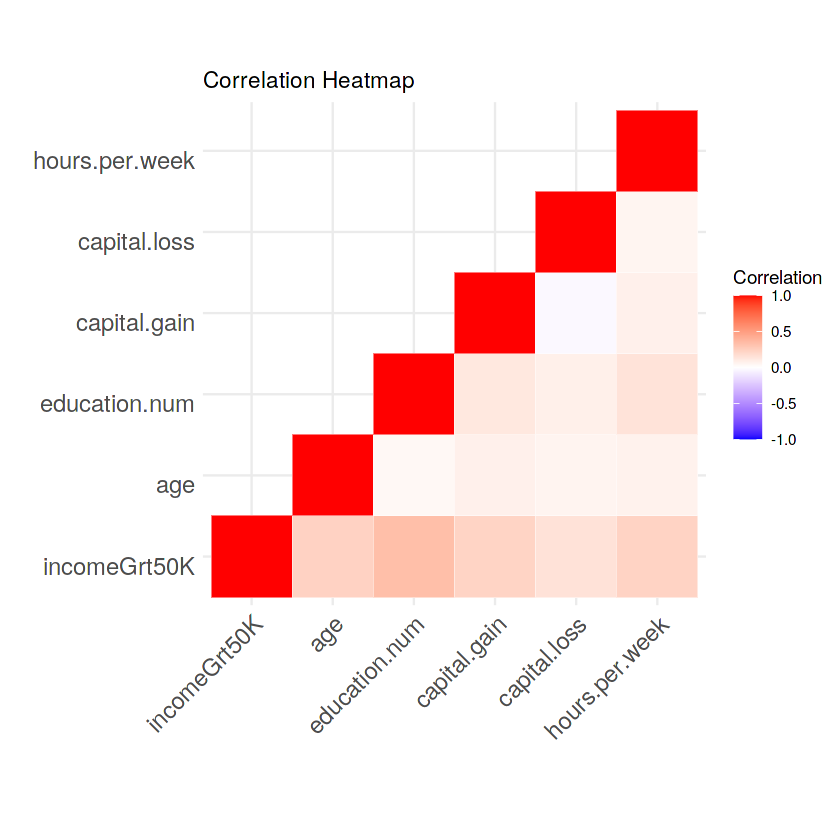

In [9]:
library(dummies)
library(reshape2)

df_income$incomeGrt50K = dummy(df_income[,c("income")])[,c("NA >50K")]
cor_mat <- cor(df_income[,c("incomeGrt50K","age","education.num","capital.gain",
                                    "capital.loss","hours.per.week")])
cor_mat [lower.tri(cor_mat)] <- NA
melted_cor <- melt(cor_mat,na.rm = TRUE)

ggplot(data = melted_cor, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Correlation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 14, hjust = 1))+
theme(axis.text.y = element_text( vjust = 1, 
    size = 14, hjust = 1))+
 coord_fixed()+ 
 ggtitle("Correlation Heatmap")+
 labs(x="",y="")

The strongest correlation is between income and education. A higher degree results in a higher income. This is also what one would expect. Hours worked per week also have a positive correlation with income. Well-paid management positions and successful self-employed people usually work more than 40 hours. 

Because the education seems important for a higher income, we will take a closer look at it. The next graph is a scatter plot with the years of education on the x-axis and the hours per week on the y-axis. As the dataset contains a lot of rows, which would result in the same amount of points in the diagramm, we  generate the graph once with all rows and once with only the rows with an income greater than 50k.

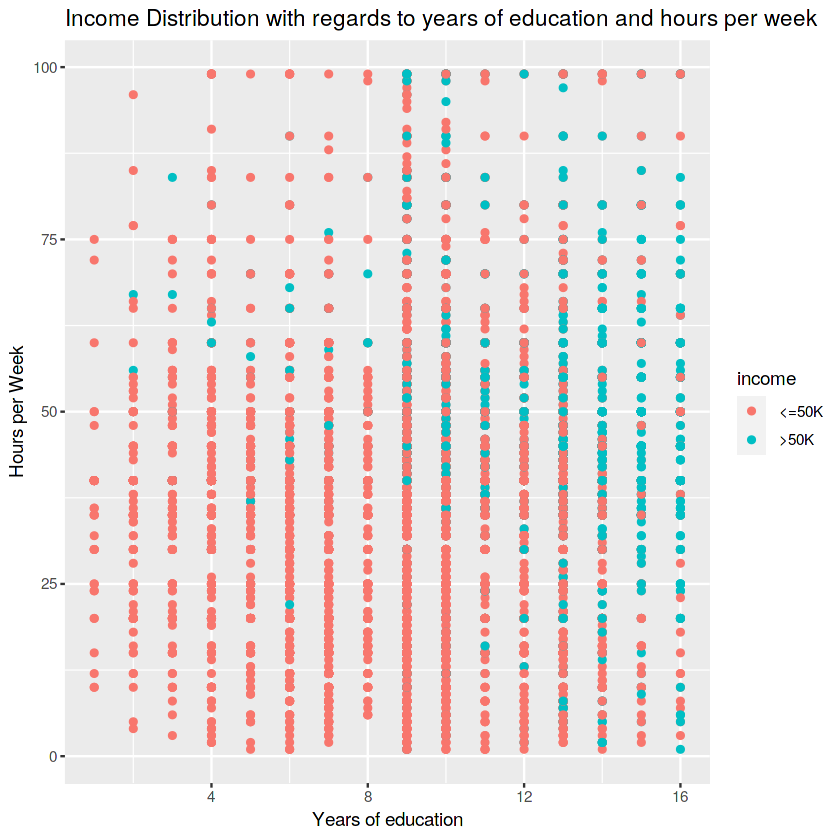

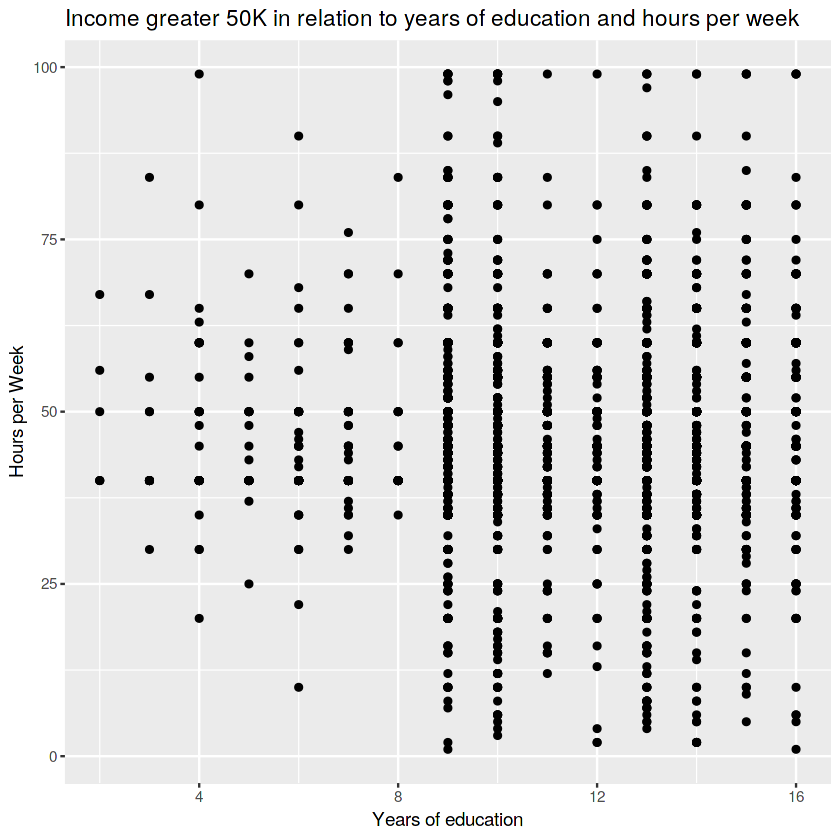

In [10]:
df_income %>% ggplot(aes(education.num, hours.per.week)) +
    (geom_point(aes(col=income))) + 
    ggtitle("Income Distribution with regards to years of education and hours per week") +
    labs(x="Years of education",y="Hours per Week")
    


df_grt50 <- df_income[ which(df_income$income==" >50K"), ]
df_grt50 %>% ggplot(aes(education.num, hours.per.week)) +
    (geom_point()) + 
    ggtitle("Income greater 50K in relation to years of education and hours per week") +
    labs(x="Years of education",y="Hours per Week")  


The second graph shows clearly, that the income greater than 50K increases rapidly with nine years of education and higher. Probably most people go to school for more than eight years, so one might think, this fact has no significance. This can be observed in the first graph. There are much more points in general after eight years of education than before that, but there is still a clear shift in the relation between the points representing an income greater 50k and smaller 50k. Especially when after 15 and 16 years of education, the chance to earn more than 50k is very high. In general the graphs show, that the longer a person studied the more likely it is that this person earns more than 50k.

Interestingly there is no strong correlation between the hours somebody works per week and his or her income noticeable. One might expect, that people working longer earn more, but this graph does not reflect this. One explanation could be that the dataset only contains the two categories "<=50K" and ">50K". There might be different results, with the numerical values of the income. Unfortunately that is only a spectulation and cannot be verified wiht this dataset.

Another relationship we want to visualize is the distribution of income in relation to age. A histogram is suitable for this purpose. On the X-axis is the age, one bar represents one year. A blue colour means that the income is greater than 50 000. Red colouring means that the income is below 50 000. The Y-axis shows the total number of records. We can clearly see that the majority of people in the dataset earn less than 50 000. There is an increase from the age of 25. The increase is probably explained by longer education and more work experience. The increase continues until about age 35. Then a plateau is reached. The plateau persists until about age 50. We therefore assume that most people earn more than 50 000 in the middle of their career.

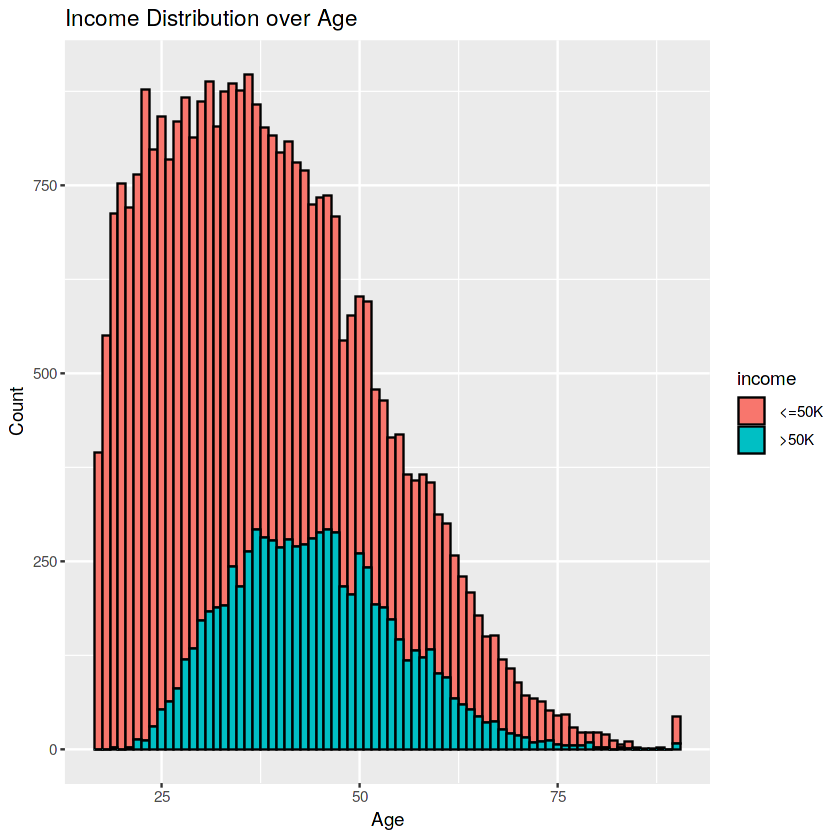

In [11]:
library(ggplot2)
ggplot(df_income) + aes(x=age, group=income,fill=income) + 
  geom_histogram( binwidth=1, color='black')+
  labs(x="Age",y="Count")+ 
  ggtitle("Income Distribution over Age")

# 4. Sources

1. Kaggle Notebook by prashant111: ["Random Forest Classifier + Feature Importance"](https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance) (28.02.2021)